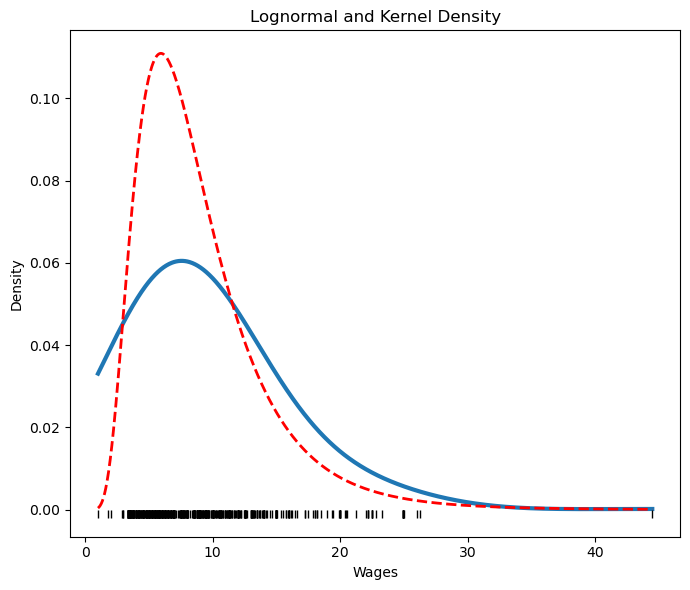

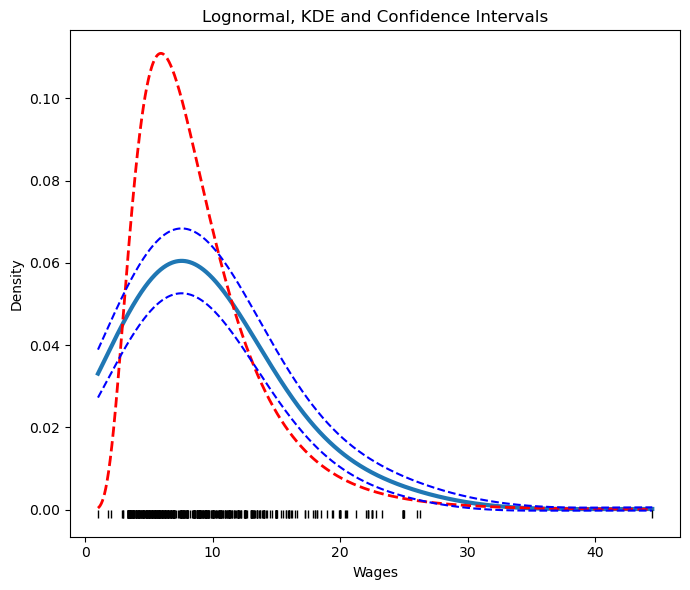

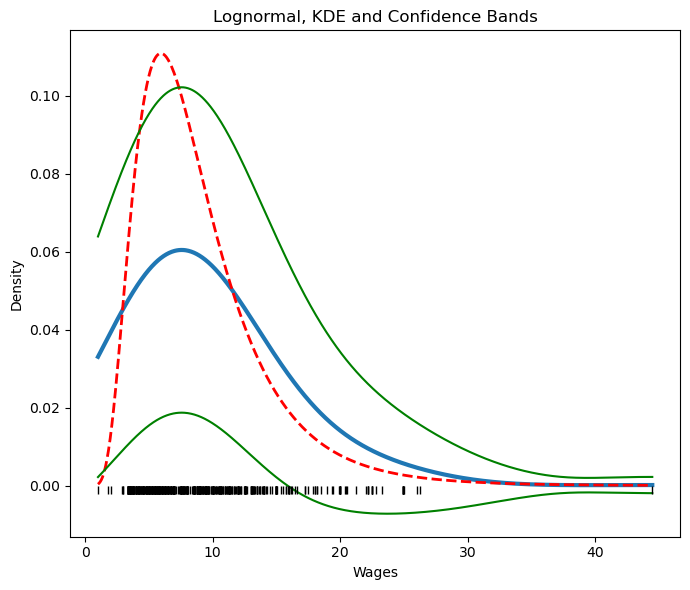

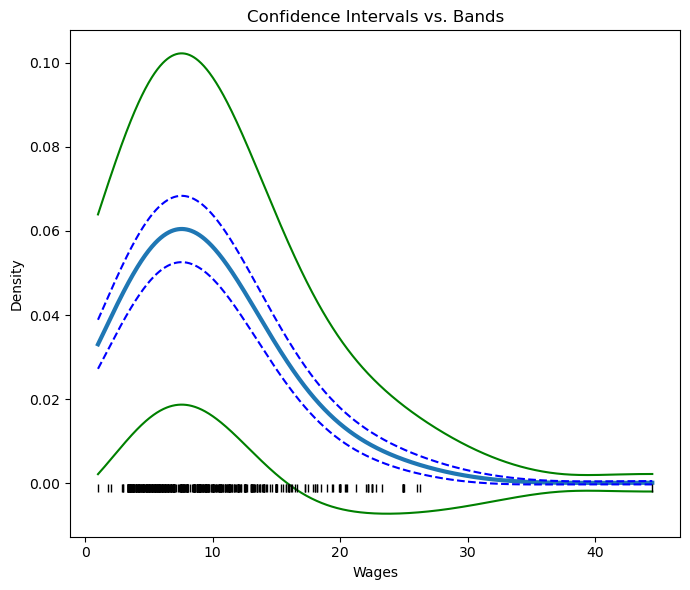

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, lognorm, norm

# Load the dataset
data = pd.read_csv('cps85.dat', delim_whitespace=True, header=None)
log_wages = data.iloc[:, 10]

# Exponentiate log wages to get actual wages
wages = np.exp(log_wages)

# Bandwidth for KDE
h = 5
alpha = 0.05
kernel = "biweight"

# Kernel density estimation
kde = gaussian_kde(wages, bw_method=h/np.std(wages, ddof=1))
x = np.linspace(wages.min(), wages.max(), 1000)
kde_values = kde(x)

# Log-normal fit
shape, loc, scale = lognorm.fit(wages, floc=0)
lognorm_values = lognorm.pdf(x, shape, loc, scale)

# Confidence intervals for KDE
cK = 5/7  # cK value for biweight kernel
calpha = norm.ppf(1 - alpha/2)
dev = calpha * np.sqrt(cK * kde_values / (len(wages) * h))
ci_upper = kde_values + dev
ci_lower = kde_values - dev

# Confidence bands for KDE
r = np.sqrt(-2 * np.log(h / np.std(wages, ddof=1)))
dn = r + 0.5 * np.log(1.5 / (2 * np.pi ** 2)) / r
calpha_band = -np.log(-np.log(1 - alpha) / 2)
dev_band = (calpha_band / r + dn) * np.sqrt(cK * kde_values / (len(wages) * h))
cb_upper = kde_values + dev_band
cb_lower = kde_values - dev_band

# Plot 1: Log-normal and kernel density
plt.figure(figsize=(7, 6), facecolor='none')
plt.plot(x, kde_values, linewidth=3)
plt.plot(x, lognorm_values, 'r--', linewidth=2)
plt.title('Lognormal and Kernel Density')
plt.xlabel('Wages')
plt.ylabel('Density')
plt.grid(False)
plt.gca().set_facecolor('none')
plt.plot(wages, np.full_like(wages, -0.001), '|k', markeredgewidth=1)  # Rug plot for observations
plt.tight_layout()
plt.savefig('plot1.png')
plt.show()

# Plot 2: Kernel density and confidence intervals
plt.figure(figsize=(7, 6), facecolor='none')
plt.plot(x, kde_values, linewidth=3)
plt.plot(x, lognorm_values, 'r--', linewidth=2)
plt.plot(x, ci_upper, 'b--')
plt.plot(x, ci_lower, 'b--')
plt.title('Lognormal, KDE and Confidence Intervals')
plt.xlabel('Wages')
plt.ylabel('Density')
plt.grid(False)
plt.gca().set_facecolor('none')
plt.plot(wages, np.full_like(wages, -0.001), '|k', markeredgewidth=1)  # Rug plot for observations
plt.tight_layout()
plt.savefig('plot2.png')
plt.show()

# Plot 3: Kernel density and confidence bands
plt.figure(figsize=(7, 6), facecolor='none')
plt.plot(x, kde_values, linewidth=3)
plt.plot(x, lognorm_values, 'r--', linewidth=2)
plt.plot(x, cb_upper, 'g-')
plt.plot(x, cb_lower, 'g-')
plt.title('Lognormal, KDE and Confidence Bands')
plt.xlabel('Wages')
plt.ylabel('Density')
plt.grid(False)
plt.gca().set_facecolor('none')
plt.plot(wages, np.full_like(wages, -0.001), '|k', markeredgewidth=1)  # Rug plot for observations
plt.tight_layout()
plt.savefig('plot3.png')
plt.show()

# Plot 4: Confidence intervals vs bands
plt.figure(figsize=(7, 6), facecolor='none')
plt.plot(x, kde_values, linewidth=3)
plt.plot(x, ci_upper, 'b--')
plt.plot(x, ci_lower, 'b--')
plt.plot(x, cb_upper, 'g-')
plt.plot(x, cb_lower, 'g-')
plt.title('Confidence Intervals vs. Bands')
plt.xlabel('Wages')
plt.ylabel('Density')
plt.grid(False)
plt.gca().set_facecolor('none')
plt.plot(wages, np.full_like(wages, -0.001), '|k', markeredgewidth=1)  # Rug plot for observations
plt.tight_layout()
plt.savefig('plot4.png')
plt.show()
